<a href="https://colab.research.google.com/github/Uemerson/experiments-tensorflow/blob/main/applying_pca_and_reverting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying PCA and reverting

## Load dataset

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape the data to have a single channel
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Normalize data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Train the model on first 50% of the training set
x_train = x_train[:int(0.5 * len(x_train))]
y_train = y_train[:int(0.5 * len(y_train))]

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
x_train[0].shape

(28, 28, 1)

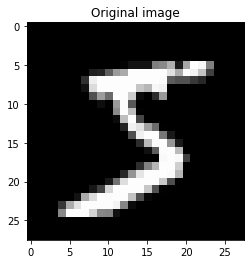

In [3]:
import numpy as np
import matplotlib.pyplot as plt

img = x_train[0]
img = np.expand_dims(img, axis=0)

# Plot the image and the prediction
plt.imshow(img.reshape(28, 28), cmap='gray')
plt.title('Original image')
plt.show()

## Make blocks with numpy

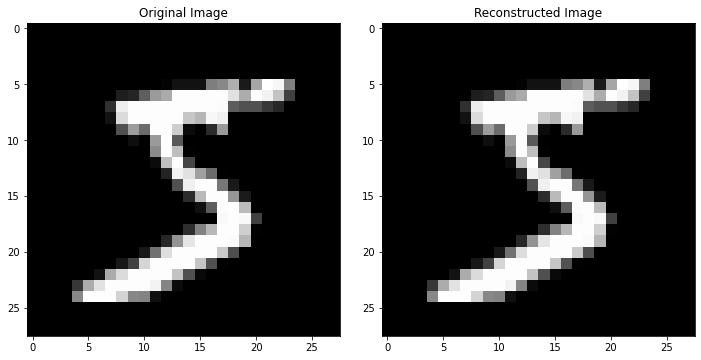

In [4]:
def extract_patches(img, patch_size=(3, 3), stride=(1, 1)):
    """Extracts patches from an image and returns a list of patches.
    
    Args:
        img: numpy array representing the input image.
        patch_size: tuple, the size of the patches to extract.
        stride: tuple, the step size between each patch.
    
    Returns:
        patches: list, a list of numpy arrays representing the extracted patches.
    """
    patches = []
    rows, cols = img.shape[:2]
    for i in range(0, rows - patch_size[0] + 1, stride[0]):
        for j in range(0, cols - patch_size[1] + 1, stride[1]):
            patch = img[i:i + patch_size[0], j:j + patch_size[1]]
            patches.append(patch)
    return patches

def revert_patches(patches, original_shape, patch_size=(3, 3), stride=(1, 1)):
    """Reverts a list of patches back to an image of the original shape.
    
    Args:
        patches: list, a list of numpy arrays representing the extracted patches.
        original_shape: tuple, the original shape of the image.
        patch_size: tuple, the size of the patches to extract.
        stride: tuple, the step size between each patch.
    
    Returns:
        img: numpy array, the image reconstructed from the patches.
    """
    rows, cols = original_shape[:2]
    img = np.zeros(original_shape, dtype=patches[0].dtype)
    patch_index = 0
    for i in range(0, rows - patch_size[0] + 1, stride[0]):
        for j in range(0, cols - patch_size[1] + 1, stride[1]):
            img[i:i + patch_size[0], j:j + patch_size[1]] = patches[patch_index]
            patch_index += 1
    return img

# import cv2

# img = cv2.imread('example.jpeg', cv2.IMREAD_GRAYSCALE)
# img = cv2.imread('example.jpg')
# img = cv2.imread('example.jpeg')

# patches = extract_patches(img, patch_size=(3,3), stride=(3,3))
# reconstructed_img = revert_patches(patches, img.shape, patch_size=(3,3), stride=(3,3))

img = x_train[0]
patch_size=(2,2)
stride=(1,1)

patches = extract_patches(img, patch_size=patch_size, stride=stride)
reconstructed_img = revert_patches(patches, img.shape, patch_size=patch_size, stride=stride)

# Plot
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.tight_layout()

axes[0].imshow(img.reshape(28,28), cmap='gray')
axes[0].set_title('Original Image')
# axes[0].axis('off')

axes[1].imshow(reconstructed_img.reshape(28,28), cmap='gray')
axes[1].set_title('Reconstructed Image')
# axes[1].axis('off')

plt.show()

In [5]:
img.shape

(28, 28, 1)

In [6]:
np.array(patches).shape

(729, 2, 2, 1)

## Applying PCA and reverting

In [7]:
import tensorflow as tf

patches = tf.convert_to_tensor(patches, tf.float64)
patches.shape

TensorShape([729, 2, 2, 1])

In [8]:
# Reshape the tensor to a 2D shape with 216 elements
# data = tf.reshape(patches, shape=(patches.shape[1]*patches.shape[2], patches.shape[3]))
data = tf.reshape(patches, shape=(patches.shape[0], patch_size[0]*patch_size[1]))

In [9]:
n_components = 1

# Normalize the data by subtracting the mean and dividing by the standard deviation
mean = tf.reduce_mean(data, axis=0)
std = tf.math.reduce_std(data, axis=0)
data = (data - mean) / std

# Perform the Singular Value Decomposition (SVD) on the data
s, u, v = tf.linalg.svd(data)

# Extract the first n principal components from the matrix v
pca_components = v[:, :n_components]

# Perform the PCA transformation on the data
transformed_data = tf.matmul(data, pca_components)

# Revert the PCA transformation on the transformed data
original_data = tf.matmul(transformed_data, tf.linalg.matrix_transpose(pca_components))

# Revert the normalization by multiplying by the standard deviation and adding the mean of the original data
original_data = (original_data * std) + mean

In [10]:
transformed_data

<tf.Tensor: shape=(729, 1), dtype=float64, numpy=
array([[-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.20955906e-01],
       [-9.209

In [11]:
original_data

<tf.Tensor: shape=(729, 4), dtype=float64, numpy=
array([[ 0.0015722, -0.0015395, -0.0015395,  0.0015722],
       [ 0.0015722, -0.0015395, -0.0015395,  0.0015722],
       [ 0.0015722, -0.0015395, -0.0015395,  0.0015722],
       ...,
       [ 0.0015722, -0.0015395, -0.0015395,  0.0015722],
       [ 0.0015722, -0.0015395, -0.0015395,  0.0015722],
       [ 0.0015722, -0.0015395, -0.0015395,  0.0015722]])>

In [12]:
# reconstruct original data to plot
reconstruct_patches = tf.reshape(original_data, (original_data.shape[0], patch_size[0], patch_size[1], 1))
reconstructed_img = revert_patches(reconstruct_patches.numpy(), img.shape, patch_size=patch_size, stride=stride)

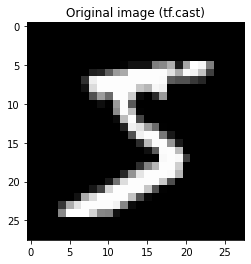

In [13]:
img_reconstructed = reconstructed_img
img_reconstructed = np.expand_dims(img, axis=0)

# Plot the image and the prediction
plt.imshow(img_reconstructed.reshape(28, 28), cmap='gray')
plt.title('Original image (tf.cast)')
plt.show()